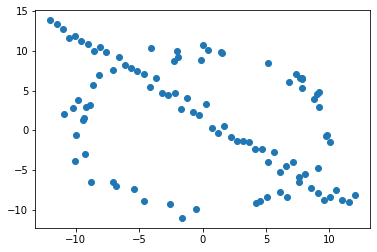

In [3]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt

np.random.seed(45)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)

n = s*np.random.randn(half_n)
t_ = 1.96*1

x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n ,1)))
X = np.vstack((X_circ, X_line))

plt.scatter(X[..., 0], X[..., 1] )

# plt.scatter(X_line, X)

# print(X_circ)
# print(X_line)
# print(X)
plt.show()

58.80042164110046
42


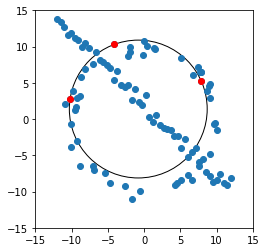

In [4]:
def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)

p = 0.8
e = 0.7
s = 3
N = np.log10(1-p)/np.log10(1-(1-e)**s)
print(N)
max_k = 0

for i in range(int(N)):
    ind1 = np.random.randint(0, 2*half_n)
    ind2 = np.random.randint(0, 2*half_n)
    ind3 = np.random.randint(0, 2*half_n)
    c1 = [X[..., 0][ind1], X[..., 1][ind1]]
    c2 = [X[..., 0][ind2], X[..., 1][ind2]]
    c3 = [X[..., 0][ind3], X[..., 1][ind3]]
    # print(c1, c2, c3)
    
    cen, rad = define_circle(c1, c2, c3)
    k = 0

    for i in range(half_n):
        a, b = X[..., 0][i], X[..., 1][i]
        if cen is None: continue
        dis2 = np.sqrt((a-cen[0])**2 + (b - cen[1])**2)
        r = rad
        
        # print(dis2, r)
        if r-t_ < dis2 < r + t_:
            k+=1
    # print(k)
    # break
    if max_k < k:
        max_k = k
        f_c1, f_c2, f_c3 = c1, c2, c3
        f_cen, f_rad = cen, rad
    if k > 50*(1-e):
        break
    # break

print(max_k)
circle=plt.Circle(f_cen,f_rad, fill = False)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_aspect('equal')
plt.scatter(X[..., 0], X[..., 1] )
plt.scatter(np.array((f_c1, f_c2, f_c3))[..., 0], np.array((f_c1, f_c2, f_c3))[..., 1], color = 'r')
plt.show()

In [5]:
import cv2 as cv
# Create point matrix get coordinates of mouse click on image
point_matrix = np.zeros((2,2),np.int)
counter = 0
def mousePoints(event,x,y,flags,params):
    global counter
    # Left button click
    if event == cv.EVENT_LBUTTONDOWN:
        point_matrix[counter] = x,y
        counter = counter + 1

C:\Users\traja\AppData\Local\Temp\ipykernel_2544\1362476941.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point_matrix = np.zeros((2,2),np.int)


[[145, 328]]
[[145, 328], [515, 373]]
[[145, 328], [515, 373], [523, 514]]
[[145, 328], [515, 373], [523, 514], [137, 521]]
[[ 2.85038346e-01 -1.53322810e-02  1.45000000e+02]
 [ 9.26796456e-02  1.74425231e-01  3.28000000e+02]
 [ 1.86918128e-04 -5.10872092e-05  1.00000000e+00]]


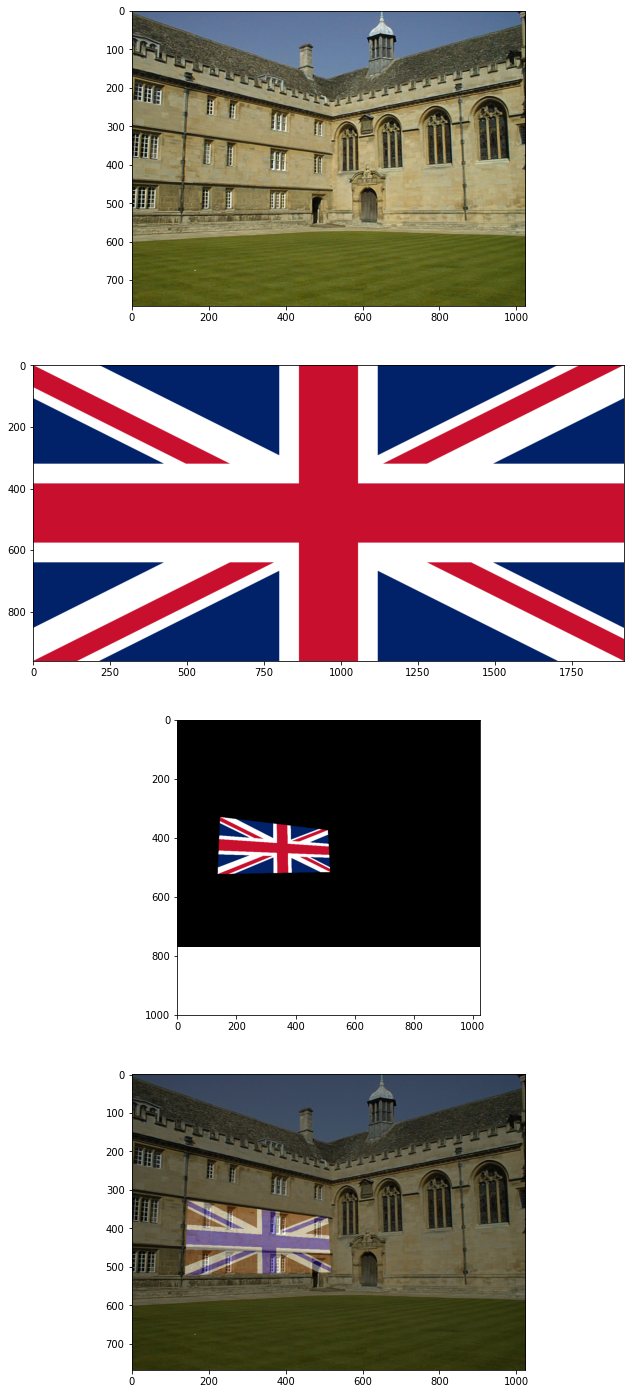

In [53]:
import cv2 as cv

dst_cordinate = [] 
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    # checking for left mouse clicks
    if event == cv.EVENT_LBUTTONDOWN:
        # displaying the coordinates
        # on the Shell 
        dst_cordinate.append([x,y])
        print(dst_cordinate)
        if len(dst_cordinate) == 4: cv.destroyAllWindows()

 
        # displaying the coordinates
        # on the image window
        # font = cv.FONT_HERSHEY_SIMPLEX
        # cv.putText(img, str(x) + ',' +
        #             str(y), (x,y), font,
        #             1, (255, 0, 0), 2)
        # cv.imshow('image', img)
 
    # checking for right mouse clicks    
    # if event==cv.EVENT_RBUTTONDOWN:
 
    #     # displaying the coordinates
    #     # on the Shell
    #     print(x, ' ', y)
 
    #     # displaying the coordinates
    #     # on the image window
    #     font = cv.FONT_HERSHEY_SIMPLEX
    #     b = img[y, x, 0]
    #     g = img[y, x, 1]
    #     r = img[y, x, 2]
    #     cv.putText(img, str(b) + ',' +
    #                 str(g) + ',' + str(r),
    #                 (x,y), font, 1,
    #                 (255, 255, 0), 2)
    #     cv.imshow('image', img)
 
# driver function
# if __name__=="__main__":
 

img = cv.imread('image/001.jpg', 1)
assert img is not None
 

cv.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
cv.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
cv.waitKey(0)
 
    # close the window
cv.destroyAllWindows()


src_cordinate = [[0, 0], [1960, 0], [1960, 960], [0, 960]]
H, status = cv.findHomography(np.array(src_cordinate), np.array(dst_cordinate))
print(H)
im4 = cv.imread('image/Flag_of_the_United_Kingdom.svg.png')
assert im4 is not None

im1to4 = cv.warpPerspective(im4, H, (np.shape(img)[1], np.shape(img)[0]))

im1= cv.cvtColor(img, cv.COLOR_BGR2RGB)
im4= cv.cvtColor(im4, cv.COLOR_BGR2RGB)
im1to4= cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)

dst = cv.addWeighted(img, 0.6, im1to4, 0.4, 0.0)
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(4, 1, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im4)
ax[2].imshow(im1to4)
ax[2].set_ylim([1000, 0])
ax[2].set_aspect('equal')
ax[3].imshow(dst)
plt.show()


cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

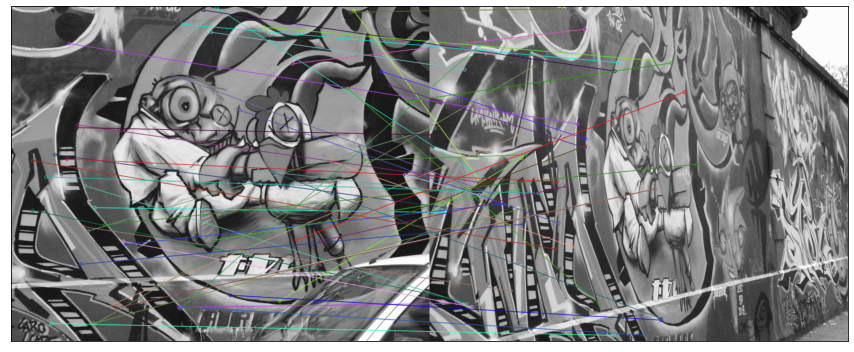

In [160]:
import cv2 as cv 
import matplotlib.pyplot as plt

im1 = cv.imread('graffiti/img1.ppm')  
im2 = cv.imread('graffiti/img5.ppm') 

assert im1 is not None
assert im2 is not None

im1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(im1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(im2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

im3 = cv.drawMatches(im1, keypoints_1, im2, keypoints_2, matches[:50], im2, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(im3)
plt.xticks([]), plt.yticks([])
plt.show()

[[ 1.65037556e-01 -3.00679184e-01  1.59328029e+02]
 [ 4.03377798e-01 -7.26674283e-01  3.84738250e+02]
 [ 1.05373809e-03 -1.88931111e-03  1.00000000e+00]]


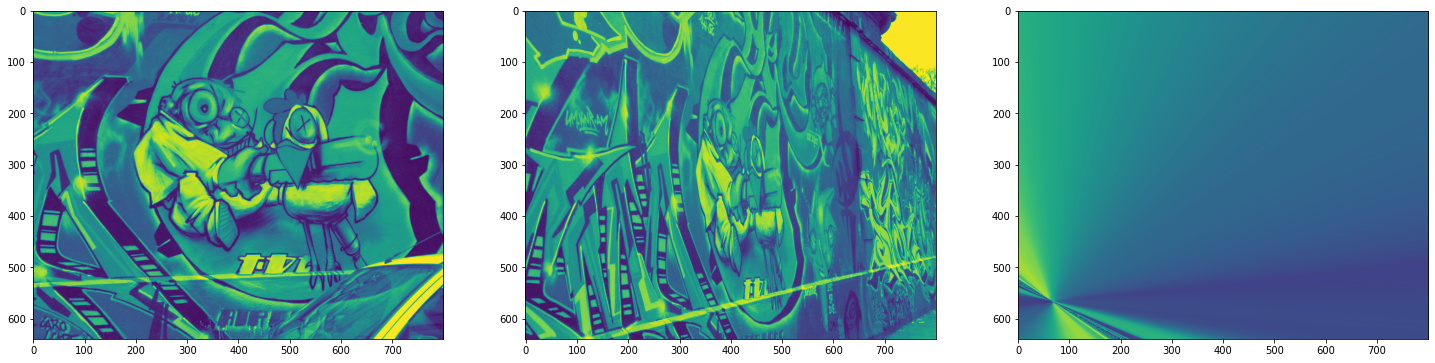

In [218]:
pts1 = []
pts2 = []
w = 0
for m in (matches):
    # if m.distance < 0.7*n.distance:
        # good.append(m)
        pts1.append(keypoints_1[m.queryIdx].pt)
        pts2.append(keypoints_2[m.trainIdx].pt)
        if w>=3: break
        w+=1
# print(pts1)
# print(pts2)
H, status = cv.findHomography(np.array(pts1), np.array(pts2))
print(H)

# H = np.array([[6.2544644e-01  , 5.7759174e-02  , 2.2201217e+02],
#   [ 2.2240536e-01  , 1.1652147e+00 , -2.5605611e+01],
#   [ 4.9212545e-04 , -3.6542424e-05  , 1.0000000e+00]])

im1to4 = cv.warpPerspective(im2, np.linalg.inv(H), (np.shape(im2)[1], np.shape(im2)[0]))


fig, ax = plt.subplots(1,3, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(im1to4)

In [154]:
pts1 = [[0,0], [40, 80], [51, 100], [20,50]]
pts2 = [[50,50], [70, 100], [10, 20], [55,100]]

H, status = cv.findHomography(np.array(pts1), np.array(pts2))
print(H)

[[-5.76231061e+00  2.42784091e+00  5.00000000e+01]
 [-1.42140152e+01  6.72727273e+00  5.00000000e+01]
 [-1.04640152e-01  4.22727273e-02  1.00000000e+00]]


In [141]:
# pts1 = [[0,0], [40, 80], [51, 100], [20,50]]
# pts2 = [[50,50], [70, 100], [10, 20], [55,100]]

def homogr(src, dst):
    z = np.array([0, 0, 0])
    A = []
    for i in range(4):
        print([z, src[i], [1], -dst[i][1] * src[i][0], -dst[i][1] * src[i][1], -dst[i][1]])
        v = np.concatenate( [z, src[i], [1], [-dst[i][1] * src[i][0], -dst[i][1] * src[i][1], -dst[i][1]]] )
        A.append(v)
        v = np.concatenate( [src[i], [1], z,  [-dst[i][0] * src[i][0], -dst[i][0] * src[i][1], -dst[i][0]]] )
        A.append(v)
    print(A)
    A = np.array(A)
    tra = A.T @ A
    w, v = np.linalg.eig(tra)
    print(v.reshape(3, 3))

homogr(pts1, pts2)

[array([0, 0, 0]), array([213., 449.]), [1], -122262.0, -257726.0, -574.0]
[array([0, 0, 0]), array([159., 384.]), [1], -62487.0, -150912.0, -393.0]
[array([0, 0, 0]), array([141., 342.]), [1], -80088.0, -194256.0, -568.0]
[array([0, 0, 0]), array([ 40., 389.]), [1], -22480.0, -218618.0, -562.0]
[array([ 0.00000e+00,  0.00000e+00,  0.00000e+00,  2.13000e+02,
        4.49000e+02,  1.00000e+00, -1.22262e+05, -2.57726e+05,
       -5.74000e+02]), array([ 2.130e+02,  4.490e+02,  1.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00, -1.704e+04, -3.592e+04, -8.000e+01]), array([ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.59000e+02,
        3.84000e+02,  1.00000e+00, -6.24870e+04, -1.50912e+05,
       -3.93000e+02]), array([ 1.5900e+02,  3.8400e+02,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00, -4.2930e+03, -1.0368e+04, -2.7000e+01]), array([ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.41000e+02,
        3.42000e+02,  1.00000e+00, -8.00880e+04, -1.94256e+05,
       -5.68000e+02])

ValueError: cannot reshape array of size 81 into shape (3,3)

[[ 2.77138662e-04 -4.37672027e-04  1.24233174e-01]
 [ 2.61210578e-03 -3.66072931e-03  9.92241193e-01]
 [ 4.64304942e-06 -6.45506586e-06  1.74384373e-03]]


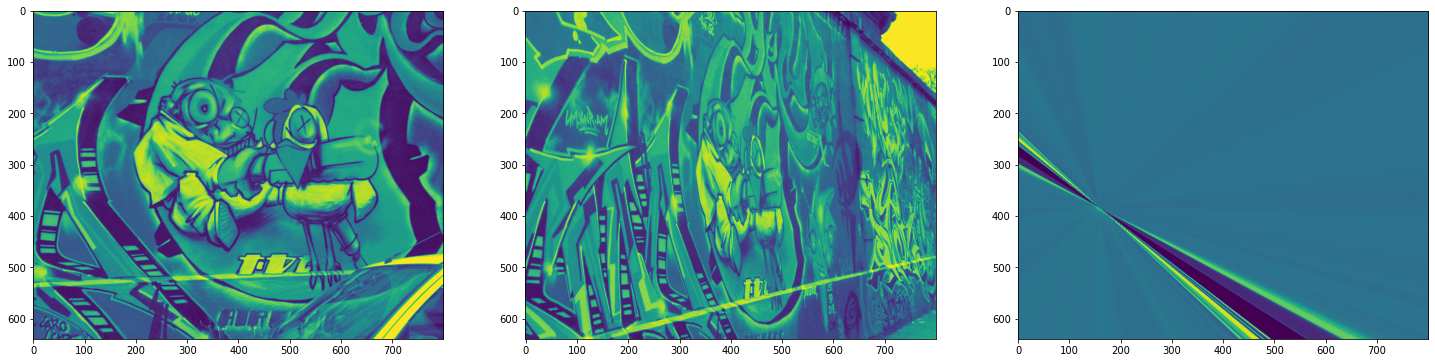

In [217]:
def homogr(src, dst):
    z = np.array([0, 0, 0])
    A = []
    for i in range(len(src)):
        # print([z, src[i], [1], -dst[i][1] * src[i][0], -dst[i][1] * src[i][1], -dst[i][1]])
        v = np.concatenate( [z, src[i], [1], [-dst[i][1] * src[i][0], -dst[i][1] * src[i][1], -dst[i][1]]] )
        A.append(v)
        vv = np.concatenate( [src[i], [1], z,  [-dst[i][0] * src[i][0], -dst[i][0] * src[i][1], -dst[i][0]]] )
        A.append(vv)
    # print(A)
    A = np.array(A)
    tra = A.T @ A

    # print(tra)
    w, v = np.linalg.eig(tra)
    ev_cor_to_smal = v[:, np.argmin(w)]
    print(ev_cor_to_smal.reshape(3, 3))
    return ev_cor_to_smal.reshape(3, 3)
    # print(tra.shape)

H = homogr(pts1, pts2)

im1to4 = cv.warpPerspective(im2, np.linalg.inv(H), (np.shape(im2)[1], np.shape(im2)[0]))


fig, ax = plt.subplots(1,3, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(im1to4)

In [211]:
pts1

[(213.9337615966797, 449.44366455078125),
 (159.52435302734375, 384.8404846191406),
 (141.3409881591797, 342.79217529296875),
 (40.70734786987305, 389.5829772949219)]